In [73]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, \
f1_score, log_loss, classification_report, roc_curve, auc, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка и предобработка данных

In [74]:
df = pd.DataFrame(data=load_iris()['data'], columns=load_iris()['feature_names'])

In [75]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [76]:
load_iris()['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [77]:
load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [78]:
df['target'] = load_iris()['target']
df = df[df.target != 2]
target_names = load_iris()['target_names'][:2]

In [79]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [80]:
sc = StandardScaler()

In [81]:
X = df.iloc[:,:-1]
y = df.target

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                    stratify=y, shuffle=True, random_state=10)

shuffle - автоматически перемешивает данные при =True
______________
random_state - для воспроизводимости случайных значений
__________
stratify=y - если переменная y является двоичной категориальной переменной со значениями 0 и 1 и есть 25% нулей и 75% единиц

In [83]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

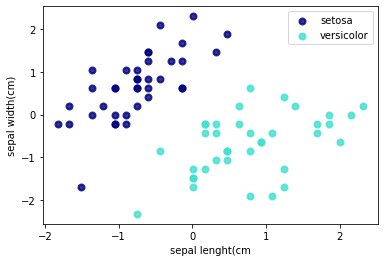

In [84]:
colors = ['navy', 'turquoise']

for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(X_train_std[y_train == i, 0],
    X_train_std[y_train == i, 1],
    color = color,
    alpha=.8,
    lw=2,
    label=target_name)
plt.xlabel('sepal lenght(cm')
plt.ylabel('sepal width(cm)')
plt.legend()
plt.show()

Моделирование
-----
Sigmoid

In [85]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [86]:
X_train = torch.FloatTensor(X_train_std)
X_test = torch.FloatTensor(X_test_std)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [87]:
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__() #доступ к оригиналам наследованных
        self.linear = nn.Linear(4,2) #на вход4 на выход 2

    def forward(self, x):
        output = torch.sigmoid(self.linear(x))
        return output

In [88]:
model = Perceptron()
# Cross Entropy - функция потерь
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) #lr-скорость обучения
#оптимизация - optim

In [89]:
model

Perceptron(
  (linear): Linear(in_features=4, out_features=2, bias=True)
)

In [90]:
y_pred = model(X_test)
before_train = criterion(y_pred, y_test)
print('Test loss before training', before_train.item())

Test loss before training 0.7667365074157715


In [91]:
import tqdm #библиотека для progress bar
import numpy as np

In [92]:
EPOCHS = 1000
volume = []

for epoch in tqdm.trange(1, EPOCHS):

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    if epoch%100==0:
        print('Epoch {:}'.format(epoch + 1))
        print('train loss: {}'.format(loss.item()), '\n', '-'*50)

    # вычисление градиентов
    loss.backward() #вектор астных производных
    # обновляем веса
    optimizer.step()
    
    # устанавливаем градиенты равными нулю
    # PyTorch накапливает градиенты при последующих обратных проходах
    optimizer.zero_grad() #чтобы не накапливать градиент
    
    with torch.no_grad(): #вычисляем вектор ошибки на тесте, функцию потерь и точность -- в список записываем
        y_pred = model(X_test)
        loss_test = criterion(y_pred, y_test)
        accuracy = (torch.argmax(y_pred, dim=1) == y_test).sum().item() / y_pred.shape[0]   
        volume.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])

 45%|████▌     | 454/999 [00:00<00:00, 2262.37it/s]

Epoch 101
train loss: 0.6964375376701355 
 --------------------------------------------------
Epoch 201
train loss: 0.636580228805542 
 --------------------------------------------------
Epoch 301
train loss: 0.5844007134437561 
 --------------------------------------------------
Epoch 401
train loss: 0.5402913689613342 
 --------------------------------------------------
Epoch 501
train loss: 0.5042500495910645 
 --------------------------------------------------


100%|██████████| 999/999 [00:00<00:00, 2364.79it/s]

Epoch 601
train loss: 0.47557443380355835 
 --------------------------------------------------
Epoch 701
train loss: 0.4530387818813324 
 --------------------------------------------------
Epoch 801
train loss: 0.4353092312812805 
 --------------------------------------------------
Epoch 901
train loss: 0.4212256371974945 
 --------------------------------------------------


Last accuracy 1.000


<AxesSubplot:xlabel='epoch'>

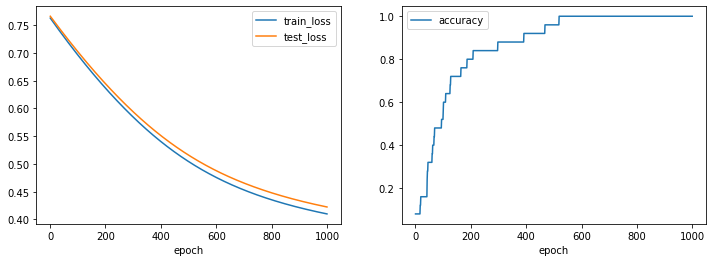

In [93]:
volume_ = pd.DataFrame(volume, columns=[
    "epoch", "train_loss", "test_loss", "accuracy"]).set_index("epoch")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

print("Last accuracy %.3f" % volume_.accuracy.iloc[-1])
volume_[["train_loss", "test_loss"]].plot(ax=ax1)
volume_[["accuracy"]].plot(ax=ax2)

ReLU

In [94]:
class Perceptron_RL(torch.nn.Module):
    def __init__(self):
        super(Perceptron_RL, self).__init__()
        self.linear = nn.Linear(4,2)
    def forward(self, x):
        output = torch.relu(self.linear(x))
        return output

In [95]:
model = Perceptron_RL()
# Cross Entropy Loss
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [96]:
model

Perceptron_RL(
  (linear): Linear(in_features=4, out_features=2, bias=True)
)

In [97]:
y_pred = model(X_test)
before_train = criterion(y_pred, y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.5094651579856873


In [98]:
EPOCHS = 1000
volume = []

for epoch in tqdm.trange(1, EPOCHS):

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    if epoch%100==0:
        print('Epoch {:}'.format(epoch + 1))
        print('train loss: {}'.format(loss.item()), '\n', '-'*50)

    # вычисление градиентов
    loss.backward()
    # обновляем веса
    optimizer.step()
    
    # устанавливаем градиенты равными нулю
    optimizer.zero_grad()
    
    with torch.no_grad():
        y_pred = model(X_test)
        loss_test = criterion(y_pred, y_test)
        accuracy = (torch.argmax(y_pred, dim=1) == y_test).sum().item() / y_pred.shape[0]   
        volume.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])

 16%|█▌        | 155/999 [00:00<00:00, 1538.74it/s]

Epoch 101
train loss: 0.05826861038804054 
 --------------------------------------------------
Epoch 201
train loss: 0.030154962092638016 
 --------------------------------------------------


 42%|████▏     | 422/999 [00:00<00:00, 2192.79it/s]

Epoch 301
train loss: 0.020320208743214607 
 --------------------------------------------------
Epoch 401
train loss: 0.015330681577324867 
 --------------------------------------------------
Epoch 501
train loss: 0.012315587140619755 
 --------------------------------------------------
Epoch 601
train loss: 0.01029660552740097 
 --------------------------------------------------


 72%|███████▏  | 715/999 [00:00<00:00, 2518.07it/s]

Epoch 701
train loss: 0.008849876001477242 
 --------------------------------------------------
Epoch 801
train loss: 0.007762121502310038 
 --------------------------------------------------
Epoch 901
train loss: 0.0069143096916377544 
 --------------------------------------------------


100%|██████████| 999/999 [00:00<00:00, 2509.54it/s]


Last accuracy 1.000


<AxesSubplot:xlabel='epoch'>

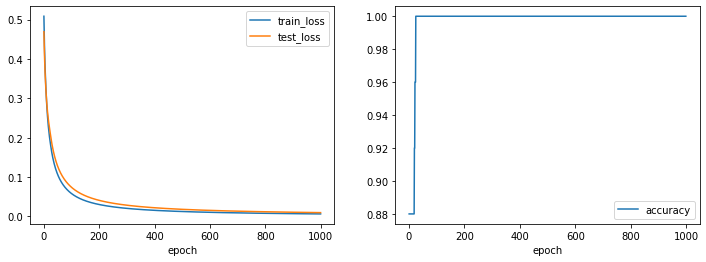

In [99]:
volume_ = pd.DataFrame(volume, columns=[
                      "epoch", "train_loss", "test_loss", "accuracy"]).set_index("epoch")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

print("Last accuracy %.3f" % volume_.accuracy.iloc[-1])
volume_[["train_loss", "test_loss"]].plot(ax=ax1)
volume_[["accuracy"]].plot(ax=ax2)


ROC-AUC

C:\Users\Admin\AppData\Local\Temp\ipykernel_30596\2527979637.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='orange')


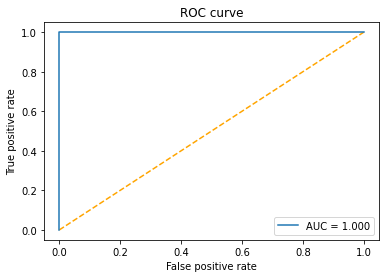

In [100]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

#plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--', color='orange')

with torch.no_grad():
    y_pred = model(X_test).numpy()
    fpr, tpr, threshold = roc_curve(y_test, y_pred[:, 1])

plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()